## Intro to sympy: 
+ #### variables
+ #### differentiation 
+ #### integration
+ #### evaluation of symbolic expressions

In [1]:
import sympy as sym
sym.init_printing() # for LaTeX formatted output

import scipy as sp

import matplotlib as mpl       # As of July 2017 Bucknell computers use v. 2.x 
import matplotlib.pyplot as plt

# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib notebook
#%matplotlib

# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

NOTES
- Sympy functions, and variables, and even floats aren't the same as numpy/scipy/python analogues.  For example
    + sym.exp != sp.exp

- Sympy has some math functions included, but not full numpy/scipy, as demonstrated in the following cells.

- Symbols that are going to used as symbolic variable must be declared as such.  This is different than in <em>Mathematica</em>. 

- One consequence is that sympy symbolic expressions must be turned into scipy/numpy/python expressions if they are to be evaluated for plotting or numerical results.  This is done with the `lambdify` command.

- In fall 2016 we're using sympy 1.0. Documentation and tutorial can be found at http://docs.sympy.org/latest/

- ML's conclusion as of 9/17/16: Don't mix `sympy` and `scipy/numpy`.  Do symbolic work with `sympy`, and then switch by "lambdifying" symbolic exressions, turning them into python functions. 

- sympy does have it's own plotting capabilities for symbolic expressions (matplotlib is a back-end).  ML hasn't explored this very deeply; so far just using matplotlib on "lambdified" expressions.  

### Symbolic variables

Given the way I imported things, the following cell doesn't work.

In [2]:
exp(3.)

NameError: name 'exp' is not defined

This does work.

In [3]:
sym.exp(3.)

And, as in <em>Mathematica</em>, the output of  the following cell will be symbolic.

In [4]:
sym.exp(3)

The analogue of <em>Mathematica</em>'s `Exp[3]//N`, or `N[Exp[3]]`, is

In [5]:
sym.exp(3).evalf()  

The analogue of <em>Mathematica</em>'s "slash-dot using" syntax `Exp[x]/.x->3` is

In [6]:
sym.exp(x).subs({x:3})

NameError: name 'x' is not defined

Oops! This is an example of not having declared `x` to be a symbolic variable.  Let's try again.

In sympy, variables that are going to be used as algebraic symbols must be declared as such.  Here's an example of a simple declaration:

In [7]:
x = sym.symbols('x')
sym.exp(x).subs({x:3.})

In [8]:
type(x)

sympy.core.symbol.Symbol

You can control, to some degree, assumptions about the symbolic variables.  (As of sympy 1.0, this is still a work in progress for sophisticated assumptions.)

In [9]:
y = sym.symbols('y',negative=True)
(4 - y).is_positive

True

The variable name used in python code, and the output representation do not have be the same.  Here's
a built-in example:

In [10]:
sym.pi, sym.E

In [11]:
sym.pi.evalf(), sym.E.evalf()

Sympy knows how to convert some standard variables to LaTeX output:

In [12]:
Sigma = sym.symbols('Sigma')
Sigma

But you can be more creative:

In [13]:
sigma, sigma_p = sym.symbols('Sigma, \Sigma^{\prime}')
sigma, sigma_p

There are other shorter ways to declare symbolic variables, but you lose some of the flexibility demonstrated above. You can import directly from a set of common symbols in the 
following way:
- `from sympy.abc import w`

### Integration

Now let's evaluate the following integral:

$$ \int\left[\sin(x y) + \cos(y z)\right]\, dx  $$

In [14]:
x,y,z = sym.symbols('x,y,z')

In [15]:
f = sym.sin(x*y) + sym.cos(y*z)  # scipy trig functions won't work!

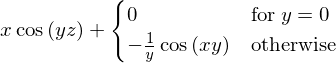

In [16]:
sym.integrate(f,x)

Now let's make it a definite integral:

$$ \int_{-1}^1\left[\sin(x y) + \cos(y z)\right]\, dx  $$

In [17]:
sym.integrate(f,(x,-1,1))

And now a 2-d integral with infinity as a limit:

$$ \int_{-\infty}^\infty\int_{-\infty}^\infty e^{-x^2-y^2}\, dxdy $$

In [18]:
sym.integrate(sym.exp(-x**2 - y**2), \
              (x, -sym.oo, sym.oo), (y, -sym.oo, sym.oo))

### Differentiation

In [19]:
x,y,z = sym.symbols('x,y,z')

In [20]:
g = sym.cos(x)**2

In [21]:
sym.diff(g,x)     # First derivative (or sym.diff(g,x,1))

In [22]:
sym.diff(g,x,2)   # Higher order derivative (or sym.diff(g,x,x))

Evaluate 
$$\frac{\partial^3}{\partial^2x\partial y} e^{xyz}$$

In [23]:
h = sym.exp(x*y*z)
sym.diff(h,x,x,y)

In [24]:
def m(x):
    return 3*x**4

In [25]:
sym.diff(m(x),x)

### Evaluating sympy expressions numerically

In [26]:
x,y,z = sym.symbols('x,y,z')

#### Evaluation at a single point

In [27]:
a = 12*x**3

In [28]:
a.subs(x,2)  # or a.sub({x:2}). In general, the argument is a dictionary

In [29]:
b = a*sym.exp(y)
b

In [30]:
b.subs(x,2)

In [31]:
b.subs({x:2,y:sym.log(1/2)})

### Turn sympy expression into a python function for subsequent use

In [32]:
f = sym.lambdify(x,a)         # Creates a python function f(x)
g = sym.lambdify((x,y),b)     # Creates a python function g(x,y)

<IPython.core.display.Javascript object>


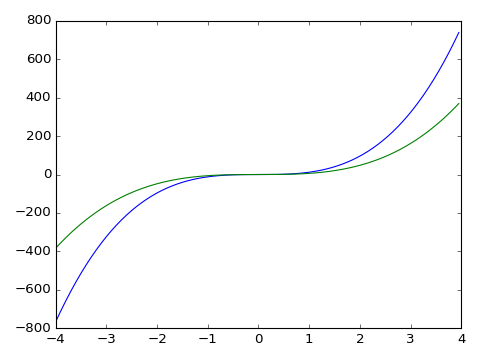

In [33]:
xx = sp.arange(-4,4,0.05) # xx so that it doesn't collide with symbolic x
y = f(xx)
z = g(xx,sp.log(1/2))
plt.figure(1)
plt.plot(xx,y)
plt.plot(xx,z);

### Version Information

`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on linuxremotes), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line.

In [34]:
%load_ext version_information

#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.


In [35]:
version_information scipy, sympy, matplotlib

Software versions
Python 3.6.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 6.1.0
OS Linux 3.10.0 327.36.3.el7.x86_64 x86_64 with redhat 7.2 Maipo
scipy 0.19.1
sympy 1.1
matplotlib 2.0.2
Tue Aug 01 14:21:23 2017 EDT